# Contents:

 LogisticRegression
 
 DecisionTree
 
 FeatureImportance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')


In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
x= data.drop('Exited',axis=1)
x.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [9]:
y= data['Exited']

In [11]:
x= pd.get_dummies(x)
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [12]:
x.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zubarev', 'Surname_Zubareva', 'Surname_Zuev', 'Surname_Zuyev',
       'Surname_Zuyeva', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object', length=2947)

In [14]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
X = data.drop(['Surname','Exited','CustomerId','RowNumber'],axis=1)

In [18]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [19]:
X['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [20]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
def geo(x):
    if x=='France':
        return 1
    elif x=='Spain':
        return 2
    else:
        return 3
    

In [26]:
X['geo']= data['Geography'].map(geo)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,2


In [27]:
X = X.drop('Geography',axis=1)

In [28]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'geo'],
      dtype='object')

In [29]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,2
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,1
4,850,Female,43,2,125510.82,1,1,1,79084.10,2


In [30]:
def gender(x):
    if x=='Female':
        return 1
    else:
        return 2

In [31]:
X= X.drop('Gender',axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,2
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,1
4,850,43,2,125510.82,1,1,1,79084.10,2


In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain,ytest = train_test_split(X,y, test_size=0.2, random_state=345)

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression(penalty='l2')

In [36]:
model1= log_reg.fit(xtrain,ytrain)

In [40]:
prediction = model1.predict(xtest)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
model1.predict_proba(xtest)

array([[0.85115315, 0.14884685],
       [0.80477144, 0.19522856],
       [0.73667269, 0.26332731],
       ...,
       [0.75922006, 0.24077994],
       [0.79651609, 0.20348391],
       [0.91600816, 0.08399184]])

In [43]:
score = model1.score(xtest ,ytest) 
score

0.799

##  Classification using Logistic Regression

In [38]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report,roc_auc_score

In [45]:
roc_curve(ytest,model1.predict_proba(xtest)[:,1])
fpr ,tpr,threshold= roc_curve(ytest,model1.predict_proba(xtest)[:,1])

Text(0, 0.5, 'exited')

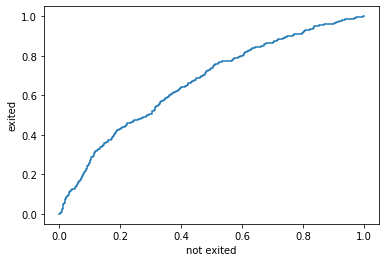

In [46]:
plt.plot(fpr,tpr,'-')
plt.xlabel('not exited')
plt.ylabel('exited')

In [48]:
roc_auc_score(ytest,model1.predict_proba(xtest)[:,1])

#to find out how better the model is working in classification

0.6669014823129028

In [52]:
cm = confusion_matrix(ytest, prediction)
cm

array([[1574,   27],
       [ 375,   24]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.799')

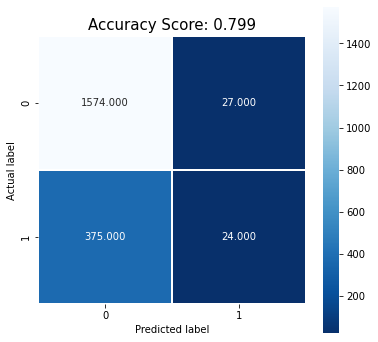

In [54]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [50]:
print(classification_report(ytest,model1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1601
           1       0.47      0.06      0.11       399

    accuracy                           0.80      2000
   macro avg       0.64      0.52      0.50      2000
weighted avg       0.74      0.80      0.73      2000



## Decision Tree

In [55]:
import sklearn.tree as tree

from sklearn.tree import DecisionTreeClassifier

In [56]:
clf= DecisionTreeClassifier(max_depth=3, random_state=321 ) 

In [57]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=321)

In [58]:
clf.score(xtest,ytest)

0.8515

In [59]:
pred_clf= clf.predict_proba(xtest)
pred_clf

array([[0.75774878, 0.24225122],
       [0.83558641, 0.16441359],
       [0.75774878, 0.24225122],
       ...,
       [0.95710741, 0.04289259],
       [0.95710741, 0.04289259],
       [0.83558641, 0.16441359]])

In [60]:
import sklearn.metrics as metrics
metrics.roc_auc_score(ytest,pred_clf[:,1])

0.7932385617385124

In [62]:
c_R = metrics.classification_report(ytest,prediction)
print(c_R)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1601
           1       0.47      0.06      0.11       399

    accuracy                           0.80      2000
   macro avg       0.64      0.52      0.50      2000
weighted avg       0.74      0.80      0.73      2000



In [63]:
metrics.confusion_matrix(ytest,prediction)

array([[1574,   27],
       [ 375,   24]], dtype=int64)

[Text(418.5, 713.475, 'CustomerId <= 42.5\ngini = 0.326\nsamples = 8000\nvalue = [6362, 1638]\nclass = 0'),
 Text(209.25, 509.625, 'Tenure <= 2.5\ngini = 0.205\nsamples = 5677\nvalue = [5020, 657]\nclass = 0'),
 Text(104.625, 305.775, 'Tenure <= 1.5\ngini = 0.184\nsamples = 5558\nvalue = [4987, 571]\nclass = 0'),
 Text(52.3125, 101.92499999999995, 'gini = 0.275\nsamples = 2737\nvalue = [2287, 450]\nclass = 0'),
 Text(156.9375, 101.92499999999995, 'gini = 0.082\nsamples = 2821\nvalue = [2700, 121]\nclass = 0'),
 Text(313.875, 305.775, 'Age <= 55948.91\ngini = 0.401\nsamples = 119\nvalue = [33, 86]\nclass = 1'),
 Text(261.5625, 101.92499999999995, 'gini = 0.5\nsamples = 51\nvalue = [25, 26]\nclass = 1'),
 Text(366.1875, 101.92499999999995, 'gini = 0.208\nsamples = 68\nvalue = [8, 60]\nclass = 1'),
 Text(627.75, 509.625, 'NumOfProducts <= 0.5\ngini = 0.488\nsamples = 2323\nvalue = [1342, 981]\nclass = 0'),
 Text(523.125, 305.775, 'CustomerId <= 50.5\ngini = 0.477\nsamples = 1043\nvalue = 

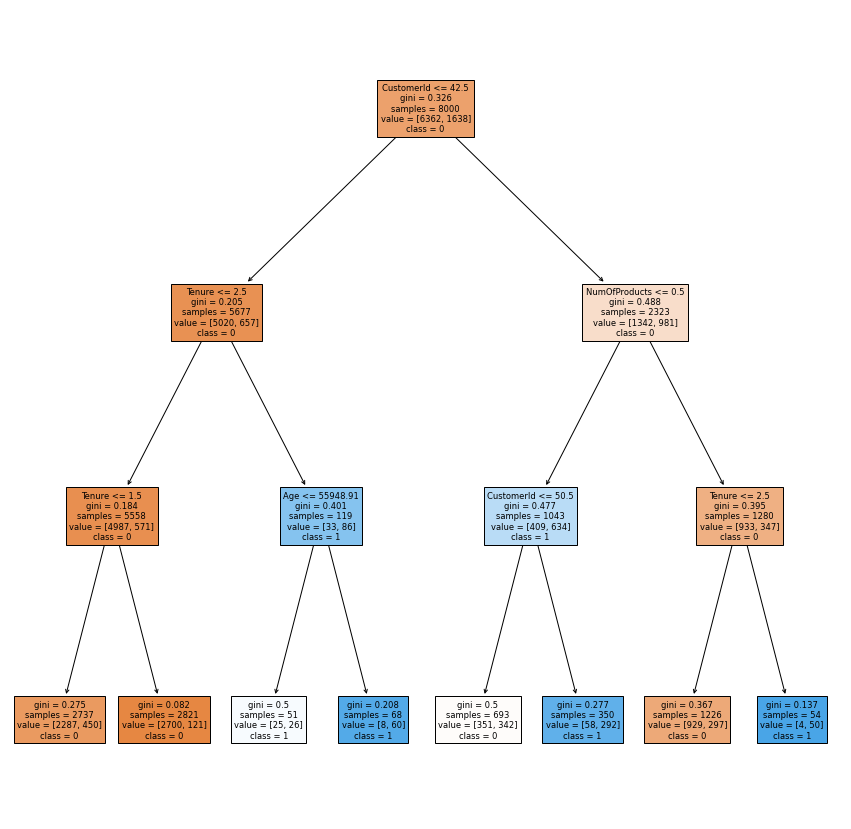

In [64]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=x.columns,
              class_names=['0','1'],
              filled=True )


In [67]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=321),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [68]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=321)

In [69]:
mod.best_score_

0.8563749999999999

### Feature Importance

In [70]:
clf.score(xtest,ytest)

0.8515

In [71]:
clf.feature_importances_

array([0.        , 0.53411891, 0.        , 0.01187462, 0.26265678,
       0.        , 0.1913497 , 0.        , 0.        ])

In [72]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

Age                0.534119
NumOfProducts      0.262657
IsActiveMember     0.191350
Balance            0.011875
CreditScore        0.000000
Tenure             0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
geo                0.000000
dtype: float64

<AxesSubplot:>

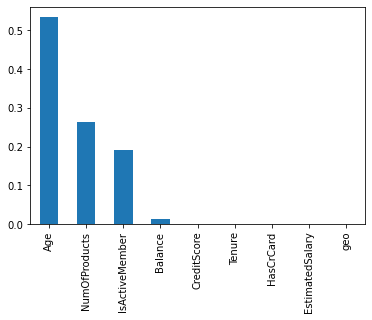

In [73]:
feature_imp.sort_values(ascending=False).plot(kind='bar')